In [1]:
#importing all libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, auc
import warnings
warnings.filterwarnings("ignore")

In [2]:
data = pd.read_csv("Zomato Restaurant Project.csv")

In [3]:
code = pd.read_excel('Country-Code.xlsx')

In [4]:
code

,Country Code,Country
0,1,India
1,14,Australia
2,30,Brazil
3,37,Canada
4,94,Indonesia
5,148,New Zealand
6,162,Phillipines
7,166,Qatar
8,184,Singapore
9,189,South Africa


In [5]:
data

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,314
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,Botswana Pula(P),Yes,No,No,No,3,4.5,Dark Green,Excellent,591
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",...,Botswana Pula(P),Yes,No,No,No,4,4.4,Green,Very Good,270
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",...,Botswana Pula(P),No,No,No,No,4,4.9,Dark Green,Excellent,365
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",...,Botswana Pula(P),Yes,No,No,No,4,4.8,Dark Green,Excellent,229
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9546,5915730,Naml۱ Gurme,208,stanbul,"Kemanke Karamustafa Pa a Mahallesi, R۱ht۱m ...",Karak _y,"Karak _y, stanbul",28.977392,41.022793,Turkish,...,Turkish Lira(TL),No,No,No,No,3,4.1,Green,Very Good,788
9547,5908749,Ceviz A ac۱,208,stanbul,"Ko uyolu Mahallesi, Muhittin st _nda Cadd...",Ko uyolu,"Ko uyolu, stanbul",29.041297,41.009847,"World Cuisine, Patisserie, Cafe",...,Turkish Lira(TL),No,No,No,No,3,4.2,Green,Very Good,1034
9548,5915807,Huqqa,208,stanbul,"Kuru _e me Mahallesi, Muallim Naci Caddesi, N...",Kuru _e me,"Kuru _e me, stanbul",29.034640,41.055817,"Italian, World Cuisine",...,Turkish Lira(TL),No,No,No,No,4,3.7,Yellow,Good,661
9549,5916112,A k Kahve,208,stanbul,"Kuru _e me Mahallesi, Muallim Naci Caddesi, N...",Kuru _e me,"Kuru _e me, stanbul",29.036019,41.057979,Restaurant Cafe,...,Turkish Lira(TL),No,No,No,No,4,4.0,Green,Very Good,901


In [6]:
df=pd.merge(data,code,on = "Country Code", how='left')
df

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes,Country
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Yes,No,No,No,3,4.8,Dark Green,Excellent,314,Phillipines
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,Yes,No,No,No,3,4.5,Dark Green,Excellent,591,Phillipines
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",...,Yes,No,No,No,4,4.4,Green,Very Good,270,Phillipines
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",...,No,No,No,No,4,4.9,Dark Green,Excellent,365,Phillipines
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",...,Yes,No,No,No,4,4.8,Dark Green,Excellent,229,Phillipines
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9546,5915730,Naml۱ Gurme,208,stanbul,"Kemanke Karamustafa Pa a Mahallesi, R۱ht۱m ...",Karak _y,"Karak _y, stanbul",28.977392,41.022793,Turkish,...,No,No,No,No,3,4.1,Green,Very Good,788,Turkey
9547,5908749,Ceviz A ac۱,208,stanbul,"Ko uyolu Mahallesi, Muhittin st _nda Cadd...",Ko uyolu,"Ko uyolu, stanbul",29.041297,41.009847,"World Cuisine, Patisserie, Cafe",...,No,No,No,No,3,4.2,Green,Very Good,1034,Turkey
9548,5915807,Huqqa,208,stanbul,"Kuru _e me Mahallesi, Muallim Naci Caddesi, N...",Kuru _e me,"Kuru _e me, stanbul",29.034640,41.055817,"Italian, World Cuisine",...,No,No,No,No,4,3.7,Yellow,Good,661,Turkey
9549,5916112,A k Kahve,208,stanbul,"Kuru _e me Mahallesi, Muallim Naci Caddesi, N...",Kuru _e me,"Kuru _e me, stanbul",29.036019,41.057979,Restaurant Cafe,...,No,No,No,No,4,4.0,Green,Very Good,901,Turkey


In [7]:
df.isnull().sum()

Restaurant ID           0
Restaurant Name         0
Country Code            0
City                    0
Address                 0
Locality                0
Locality Verbose        0
Longitude               0
Latitude                0
Cuisines                9
Average Cost for two    0
Currency                0
Has Table booking       0
Has Online delivery     0
Is delivering now       0
Switch to order menu    0
Price range             0
Aggregate rating        0
Rating color            0
Rating text             0
Votes                   0
Country                 0
dtype: int64

There is only one column which has some null values which we can process it easily later.

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9551 entries, 0 to 9550
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Restaurant ID         9551 non-null   int64  
 1   Restaurant Name       9551 non-null   object 
 2   Country Code          9551 non-null   int64  
 3   City                  9551 non-null   object 
 4   Address               9551 non-null   object 
 5   Locality              9551 non-null   object 
 6   Locality Verbose      9551 non-null   object 
 7   Longitude             9551 non-null   float64
 8   Latitude              9551 non-null   float64
 9   Cuisines              9542 non-null   object 
 10  Average Cost for two  9551 non-null   int64  
 11  Currency              9551 non-null   object 
 12  Has Table booking     9551 non-null   object 
 13  Has Online delivery   9551 non-null   object 
 14  Is delivering now     9551 non-null   object 
 15  Switch to order menu 

There are many columns with Dtypes as "Object",we will need Label Encoder later to process this.

# EDA

In [9]:
df.nunique()

Restaurant ID           9551
Restaurant Name         7446
Country Code              15
City                     141
Address                 8918
Locality                1208
Locality Verbose        1265
Longitude               8120
Latitude                8677
Cuisines                1825
Average Cost for two     140
Currency                  12
Has Table booking          2
Has Online delivery        2
Is delivering now          2
Switch to order menu       1
Price range                4
Aggregate rating          33
Rating color               6
Rating text                6
Votes                   1012
Country                   15
dtype: int64

We have a column with only one unique Value hence it will not be of any use in Model training.We also have a column with no use of us i.e. "Restaurant ID"

So we will have to Drop this two columns later.

<AxesSubplot:title={'center':'Rating'}, xlabel='Rating text', ylabel='count'>

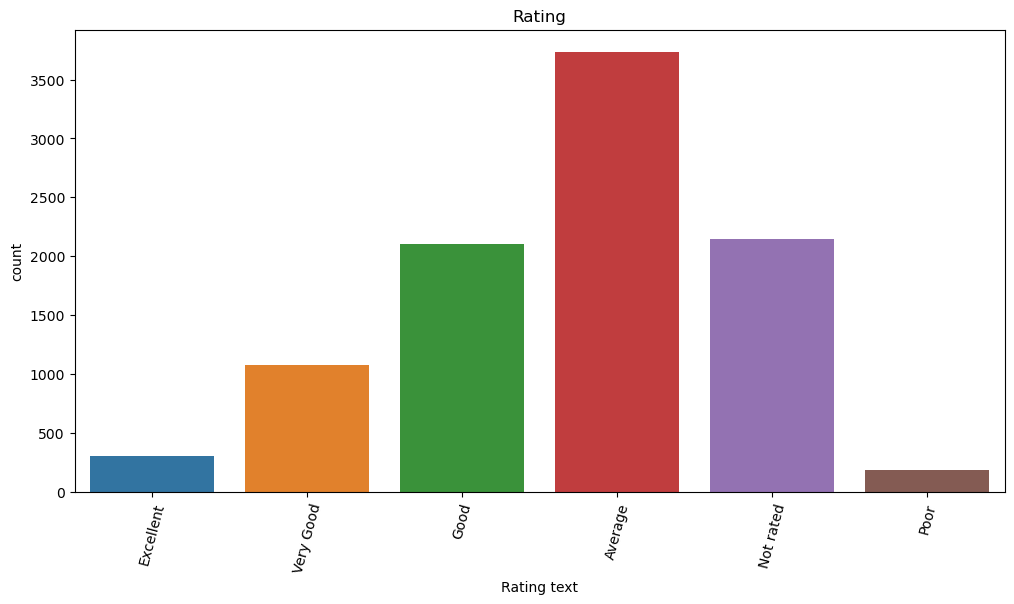

In [10]:
plt.figure(figsize=(12,6))
plt.xticks(rotation=75)
plt.title('Rating')
sns.countplot(x='Rating text', data=df)

As we can see most of the Ratings are "Average" and ratings such as "Poor" and "Excellent" are very low.

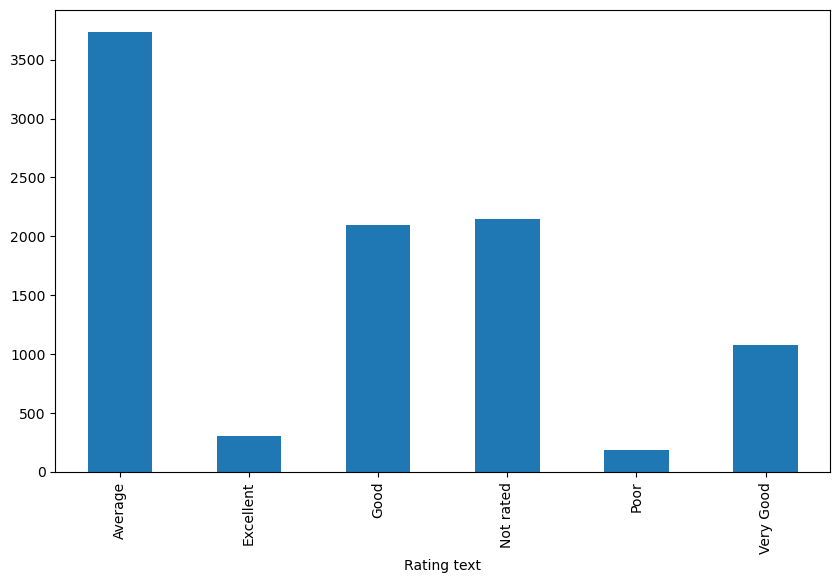

In [11]:
fig = plt.figure(figsize=(10,6))
ax = df.groupby('Rating text').Currency.count().plot.bar(ylim=0)
plt.show()

[Text(0, 0, 'Excellent'), Text(1, 0, 'Very Good'), Text(2, 0, 'Good'), Text(3, 0, 'Average'), Text(4, 0, 'Not rated'), Text(5, 0, 'Poor')]


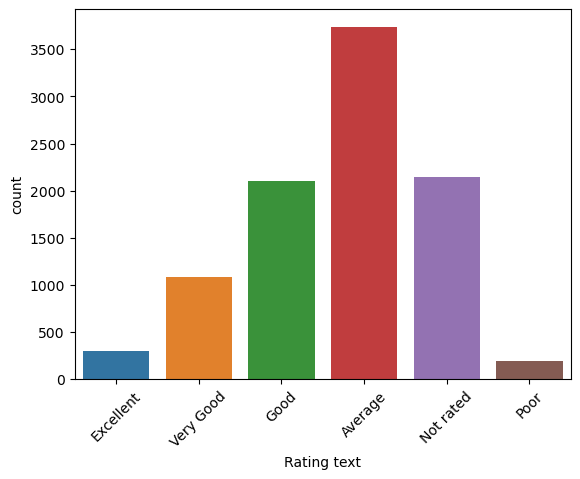

In [12]:
#data.rates.nunique()
chart=sns.countplot(x=df['Rating text'])
print(chart.set_xticklabels(chart.get_xticklabels(), rotation=45))

<AxesSubplot:title={'center':'Price Range'}, xlabel='Price range', ylabel='count'>

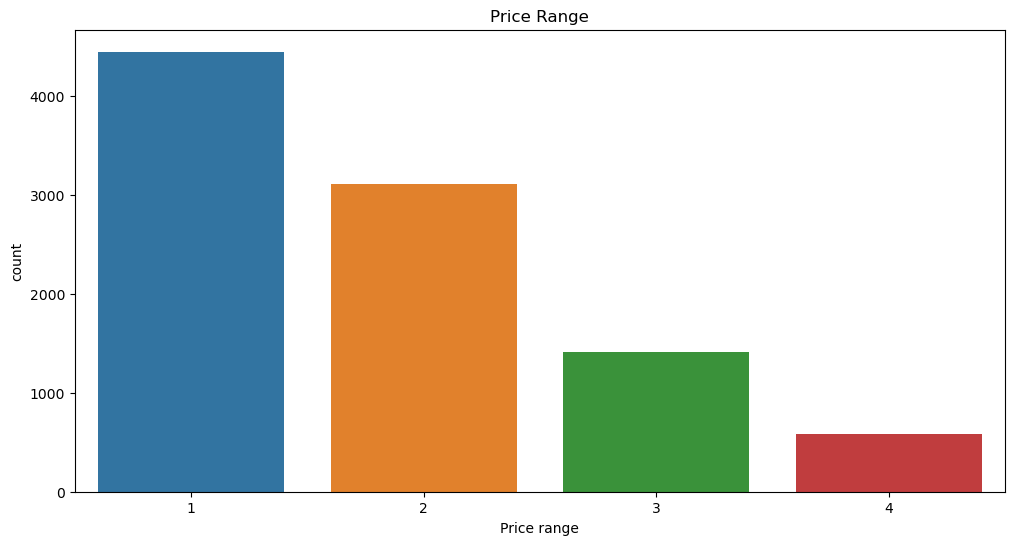

In [13]:
plt.figure(figsize=(12,6))
plt.title('Price Range')
sns.countplot(x='Price range', data=df)

Most of the Resturants have Price Range in "1" and price range of "4" is the Lowest in Resturants.

In [14]:
df['Aggregate rating'].value_counts()

0.0    2148
3.2     522
3.1     519
3.4     498
3.3     483
3.5     480
3.0     468
3.6     458
3.7     427
3.8     400
2.9     381
3.9     335
2.8     315
4.1     274
4.0     266
2.7     250
4.2     221
2.6     191
4.3     174
4.4     144
2.5     110
4.5      95
2.4      87
4.6      78
4.9      61
2.3      47
4.7      42
2.2      27
4.8      25
2.1      15
2.0       7
1.9       2
1.8       1
Name: Aggregate rating, dtype: int64

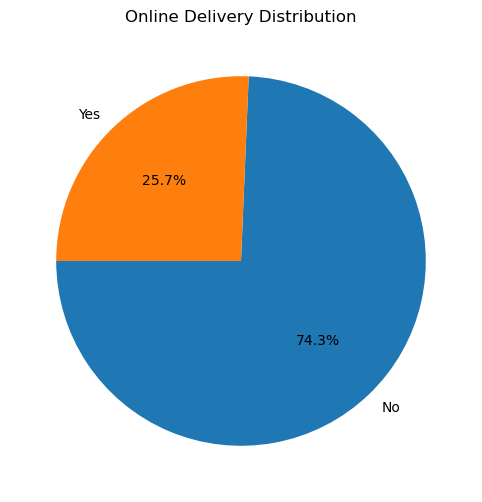

In [15]:
plt.figure(figsize=(12,6))
plt.title('Online Delivery Distribution')
plt.pie(df['Has Online delivery'].value_counts()/9551*100, labels=df['Has Online delivery'].value_counts().index, autopct='%1.1f%%', startangle=180);

Only 1/4th of the Resturants are providing with Online Delivery.

In [16]:
df['City'].value_counts()

New Delhi           5473
Gurgaon             1118
Noida               1080
Faridabad            251
Ghaziabad             25
                    ... 
Panchkula              1
Mc Millan              1
Mayfield               1
Macedon                1
Vineland Station       1
Name: City, Length: 141, dtype: int64

Data has most of it's source from New Delhi.

Text(0.5, 1.0, 'Resturants Listing on Zomanto')

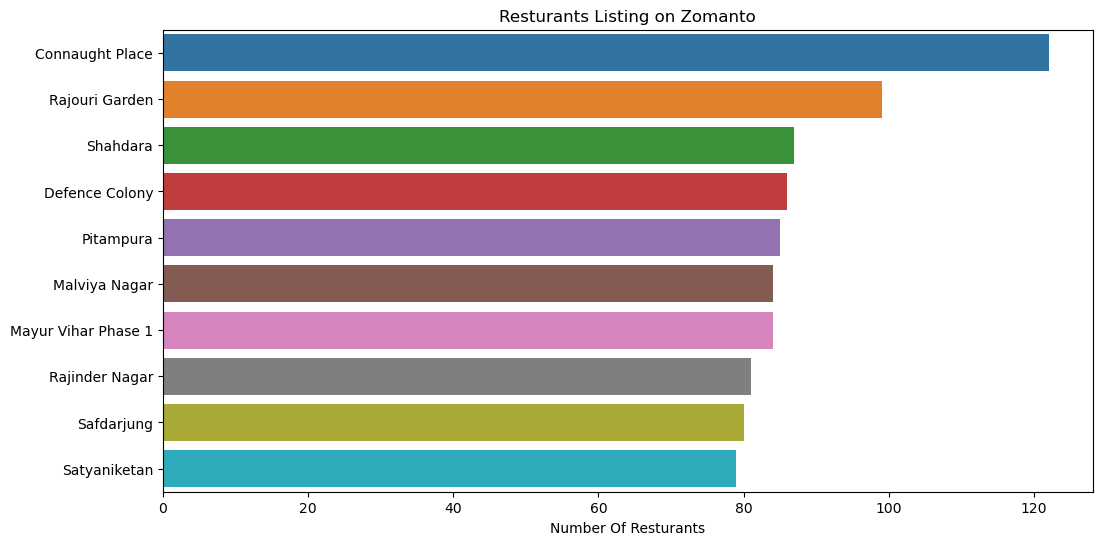

In [17]:
Delhi =df[(df.City == 'New Delhi')]
plt.figure(figsize=(12,6))
sns.barplot(x=Delhi.Locality.value_counts().head(10), y=Delhi.Locality.value_counts().head(10).index)

plt.ylabel(None)
plt.xlabel('Number Of Resturants')
plt.title('Resturants Listing on Zomanto')

Connaught place seems to have high no of resturatants registered with Zomato in Delhi.And Most of the Data is also Based on Delhi as well hence Connaught place has overall most Resturants in the whole data.

In [18]:
df['Average Cost for two'].value_counts()

500       900
300       897
400       857
200       687
600       652
         ... 
8000        1
2350        1
150000      1
70000       1
545         1
Name: Average Cost for two, Length: 140, dtype: int64

<AxesSubplot:xlabel='Rating text', ylabel='Average Cost for two'>

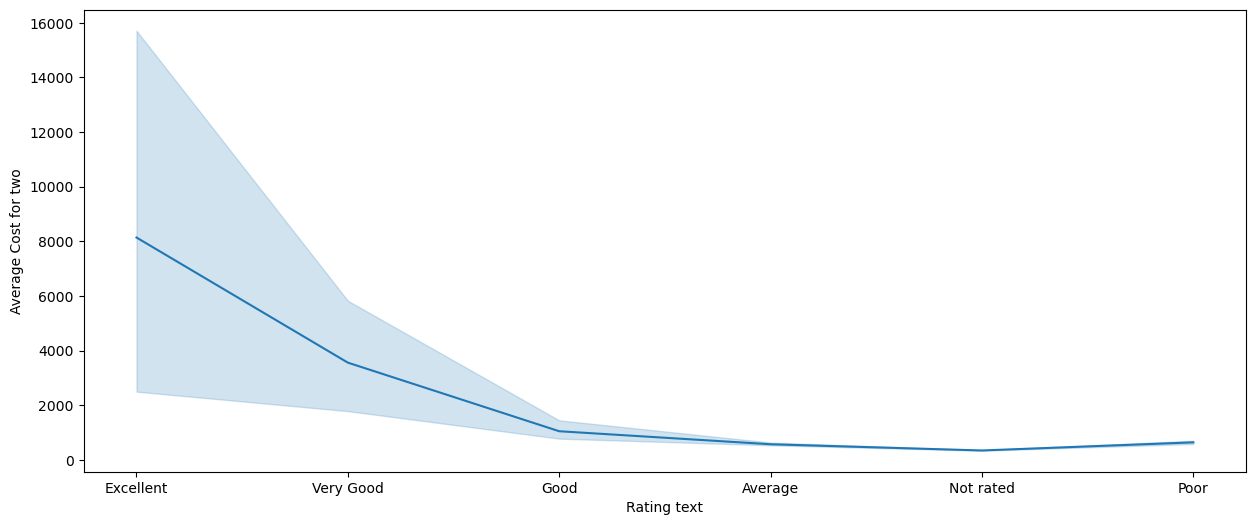

In [19]:
plt.figure(figsize=(15,6))
sns.lineplot(x=df['Rating text'],y=df['Average Cost for two'])

Average Cost for Dinning for Resturants with High rating are more Costly as compared to Resturants with low costs.

<AxesSubplot:xlabel='Country', ylabel='Aggregate rating'>

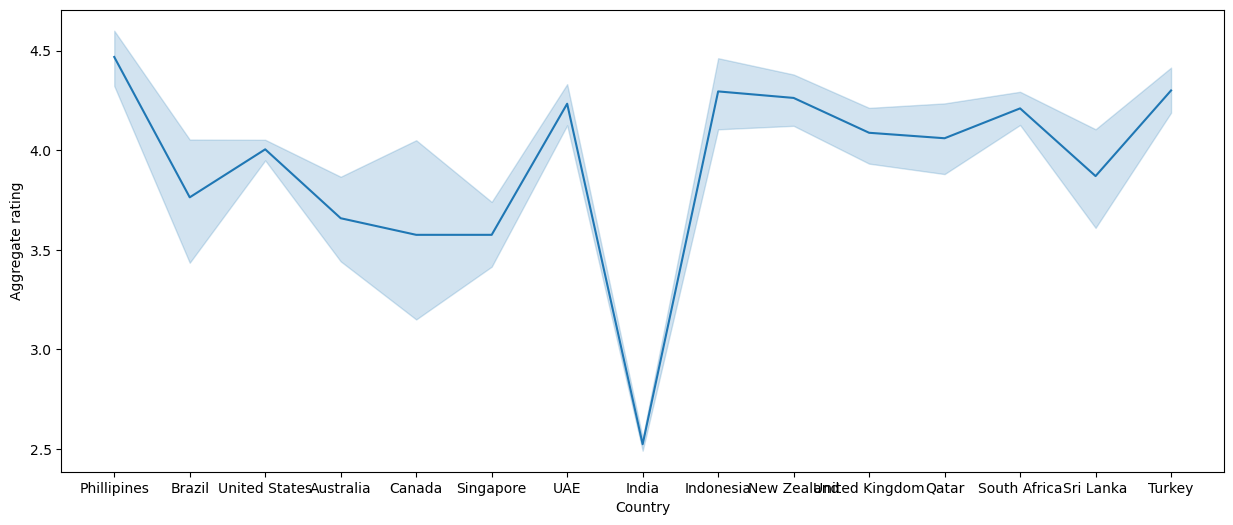

In [20]:
plt.figure(figsize=(15,6))
sns.lineplot(y=df['Aggregate rating'],x=df['Country'])

Average Rating for Resturants in india is Lowest than in any other Country.But Due to most of the Zomato resturants being in india this might affect this graph

In [21]:
df['Cuisines'].value_counts()

North Indian                                             936
North Indian, Chinese                                    511
Chinese                                                  354
Fast Food                                                354
North Indian, Mughlai                                    334
                                                        ... 
Bengali, Fast Food                                         1
North Indian, Rajasthani, Asian                            1
Chinese, Thai, Malaysian, Indonesian                       1
Bakery, Desserts, North Indian, Bengali, South Indian      1
Italian, World Cuisine                                     1
Name: Cuisines, Length: 1825, dtype: int64

As most of the Resturants are from New Delhi,we can also see that most of the Cuisines are North Indian.

<AxesSubplot:xlabel='Cuisines', ylabel='Aggregate rating'>

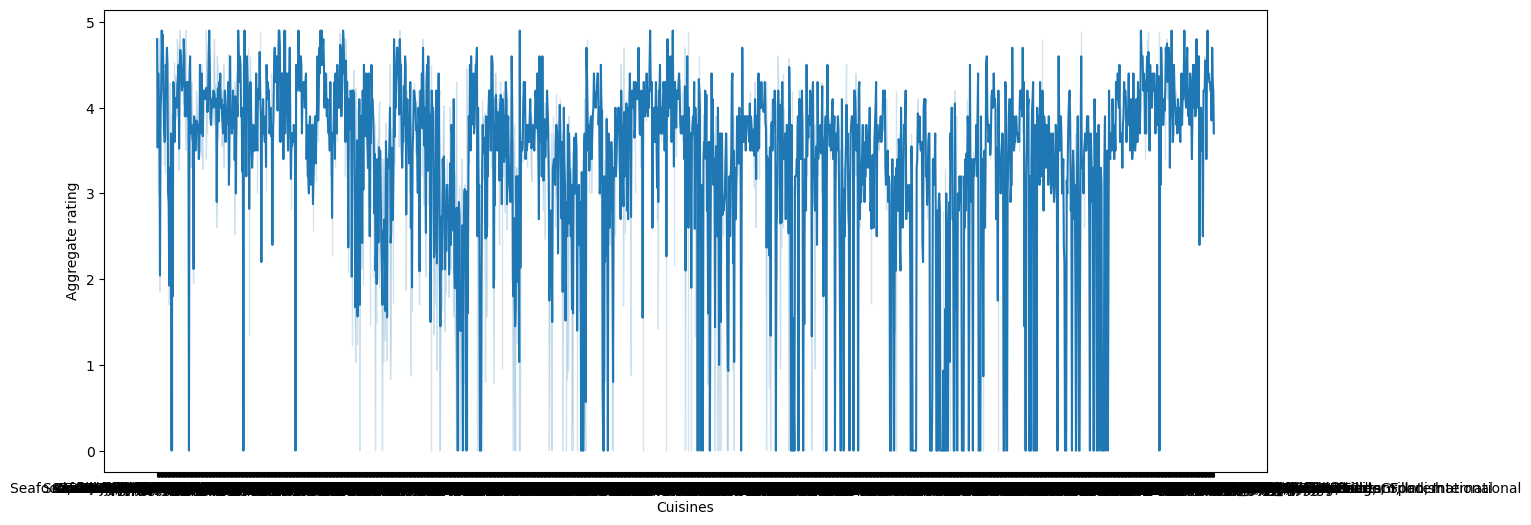

In [22]:
plt.figure(figsize=(15,6))
sns.lineplot(y=df['Aggregate rating'], x=df['Cuisines'])

In [23]:
df.Cuisines.count

<bound method Series.count of 0             French, Japanese, Desserts
1                               Japanese
2       Seafood, Asian, Filipino, Indian
3                        Japanese, Sushi
4                       Japanese, Korean
                      ...               
9546                             Turkish
9547     World Cuisine, Patisserie, Cafe
9548              Italian, World Cuisine
9549                     Restaurant Cafe
9550                                Cafe
Name: Cuisines, Length: 9551, dtype: object>

There are also most Cafe in cuisines as we can see.

Text(0.5, 1.0, 'Resturants Online Delivery')

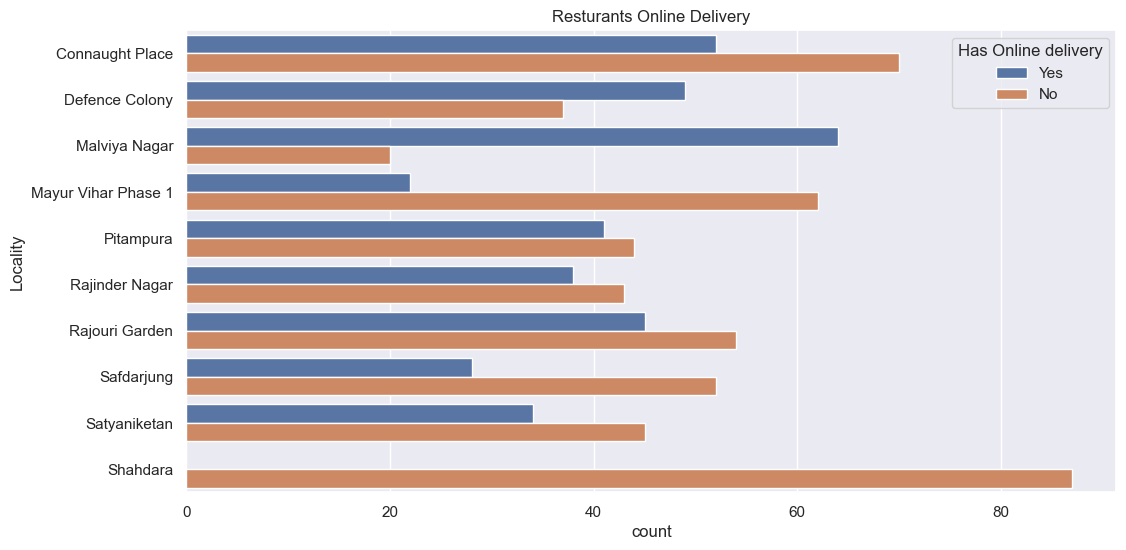

In [24]:
top_locality = Delhi.Locality.value_counts().head(10)
sns.set_theme(style="darkgrid")
plt.figure(figsize=(12,6))
ax = sns.countplot(y ="Locality", hue='Has Online delivery', data=Delhi[Delhi.Locality.isin(top_locality.index)])
plt.title('Resturants Online Delivery')

There are most Resturants who does not provide Online Delivery in most of the place except in "Malviya Nagar"

Text(0.5, 1.0, 'Rating Vs Cost of Two')

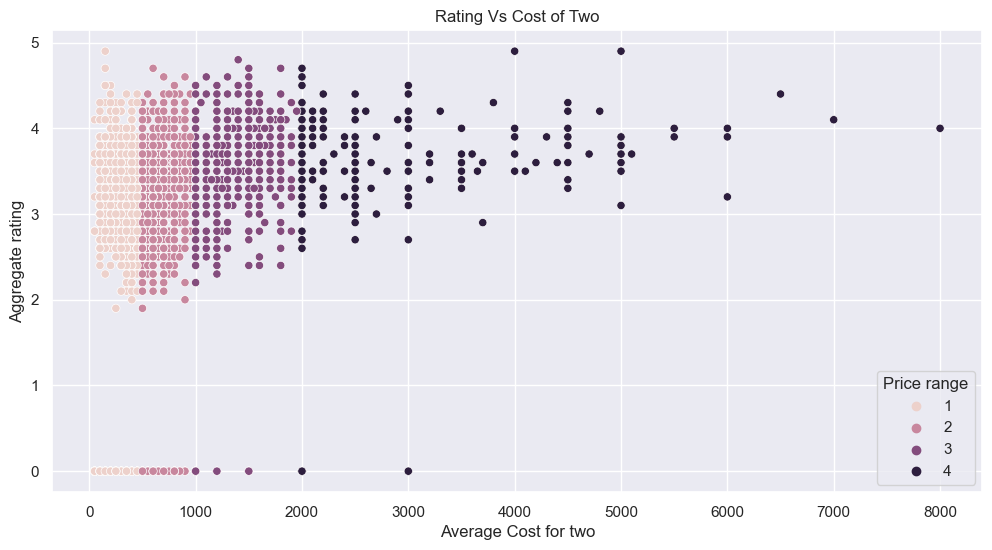

In [25]:
plt.figure(figsize=(12,6))
sns.scatterplot(x="Average Cost for two", y="Aggregate rating", hue='Price range', data=Delhi)


plt.xlabel("Average Cost for two")
plt.ylabel("Aggregate rating")
plt.title('Rating Vs Cost of Two')

As we can see Average Cost for Dinning for Resturants with High rating are mostly costly as compared to Resturants with low Costs.Any Resturants with Price Range of "4" has Average Rating in Higher Brackets and as the Cost Increasing the Rating alsi increasing as well 

In [26]:
df.shape

(9551, 22)

In [27]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Restaurant ID,9551.0,9.051128e+06,8.791521e+06,53.000000,301962.500000,6.004089e+06,1.835229e+07,1.850065e+07
Country Code,9551.0,1.836562e+01,5.675055e+01,1.000000,1.000000,1.000000e+00,1.000000e+00,2.160000e+02
Longitude,9551.0,6.412657e+01,4.146706e+01,-157.948486,77.081343,7.719196e+01,7.728201e+01,1.748321e+02
Latitude,9551.0,2.585438e+01,1.100794e+01,-41.330428,28.478713,2.857047e+01,2.864276e+01,5.597698e+01
Average Cost for two,9551.0,1.199211e+03,1.612118e+04,0.000000,250.000000,4.000000e+02,7.000000e+02,8.000000e+05
Price range,9551.0,1.804837e+00,9.056088e-01,1.000000,1.000000,2.000000e+00,2.000000e+00,4.000000e+00
Aggregate rating,9551.0,2.666370e+00,1.516378e+00,0.000000,2.500000,3.200000e+00,3.700000e+00,4.900000e+00
Votes,9551.0,1.569097e+02,4.301691e+02,0.000000,5.000000,3.100000e+01,1.310000e+02,1.093400e+04


# Data Preprocessing

In [28]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.preprocessing import MinMaxScaler

le=LabelEncoder

In [29]:
df.nunique()

Restaurant ID           9551
Restaurant Name         7446
Country Code              15
City                     141
Address                 8918
Locality                1208
Locality Verbose        1265
Longitude               8120
Latitude                8677
Cuisines                1825
Average Cost for two     140
Currency                  12
Has Table booking          2
Has Online delivery        2
Is delivering now          2
Switch to order menu       1
Price range                4
Aggregate rating          33
Rating color               6
Rating text                6
Votes                   1012
Country                   15
dtype: int64

There are many column with Yes/No columns so Data Processing is needed here also on many other columns among them

There is one column with some Nan values and lets replace NaNs with mode of the column where it is located using model() on 'Cuisines' column

In [30]:
df['Cuisines'].value_counts()

North Indian                                             936
North Indian, Chinese                                    511
Chinese                                                  354
Fast Food                                                354
North Indian, Mughlai                                    334
                                                        ... 
Bengali, Fast Food                                         1
North Indian, Rajasthani, Asian                            1
Chinese, Thai, Malaysian, Indonesian                       1
Bakery, Desserts, North Indian, Bengali, South Indian      1
Italian, World Cuisine                                     1
Name: Cuisines, Length: 1825, dtype: int64

In [31]:
df['Cuisines'].fillna(df['Cuisines'].mode()[0], inplace=True)

Replacing the columns with yes/no options to binary i.e.0/1.

In [32]:
df['Has Online delivery'].replace({'No': 0, 'Yes': 1}, inplace = True)
df['Has Table booking'].replace({'No': 0, 'Yes': 1}, inplace = True)
df['Is delivering now'].replace({'No': 0, 'Yes': 1}, inplace = True)

In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9551 entries, 0 to 9550
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Restaurant ID         9551 non-null   int64  
 1   Restaurant Name       9551 non-null   object 
 2   Country Code          9551 non-null   int64  
 3   City                  9551 non-null   object 
 4   Address               9551 non-null   object 
 5   Locality              9551 non-null   object 
 6   Locality Verbose      9551 non-null   object 
 7   Longitude             9551 non-null   float64
 8   Latitude              9551 non-null   float64
 9   Cuisines              9551 non-null   object 
 10  Average Cost for two  9551 non-null   int64  
 11  Currency              9551 non-null   object 
 12  Has Table booking     9551 non-null   int64  
 13  Has Online delivery   9551 non-null   int64  
 14  Is delivering now     9551 non-null   int64  
 15  Switch to order menu 

In [34]:
df.nunique()

Restaurant ID           9551
Restaurant Name         7446
Country Code              15
City                     141
Address                 8918
Locality                1208
Locality Verbose        1265
Longitude               8120
Latitude                8677
Cuisines                1825
Average Cost for two     140
Currency                  12
Has Table booking          2
Has Online delivery        2
Is delivering now          2
Switch to order menu       1
Price range                4
Aggregate rating          33
Rating color               6
Rating text                6
Votes                   1012
Country                   15
dtype: int64

Categorical features need to be converted to numbers so that they can be included in calculations done by a machine learning model.The categorical variables in our data set are not ordinal (i.e. there is no order in them)

In [35]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()

We have to label encode "Currency","Locality","Cuisines","Country","City" columns as it is very much required in our data

In [36]:
df['Currency'] = le.fit_transform(df['Currency'])

In [37]:
df['Locality'] = le.fit_transform(df['Locality'])

In [38]:
df['Cuisines'] = le.fit_transform(df['Cuisines'])

In [39]:
df['Country'] = le.fit_transform(df['Country'])

In [40]:
df['City'] = le.fit_transform(df['City'])

We have to Drop some columns which are not required that are "Resturant ID",'Restaurant Name','Address','Locality Verbose','Longitude','Latitude','Switch to order menu','Rating color','Rating Text'.

In [41]:
df=df.drop(['Restaurant ID','Restaurant Name','Address','Locality Verbose','Longitude','Latitude','Switch to order menu','Rating color','Rating text'], axis=1)

In [42]:
df

,Country Code,City,Locality,Cuisines,Average Cost for two,Currency,Has Table booking,Has Online delivery,Is delivering now,Price range,Aggregate rating,Votes,Country
0,162,74,175,920,1100,0,1,0,0,3,4.8,314,6
1,162,74,597,1111,1200,0,1,0,0,3,4.5,591,6
2,162,76,312,1671,4000,0,1,0,0,4,4.4,270,6
3,162,76,866,1126,1500,0,0,0,0,4,4.9,365,6
4,162,76,866,1122,1500,0,1,0,0,4,4.8,229,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9546,208,0,522,1813,80,11,0,0,0,3,4.1,788,11
9547,208,0,547,1824,105,11,0,0,0,3,4.2,1034,11
9548,208,0,559,1110,170,11,0,0,0,4,3.7,661,11
9549,208,0,559,1657,120,11,0,0,0,4,4.0,901,11


<AxesSubplot:>

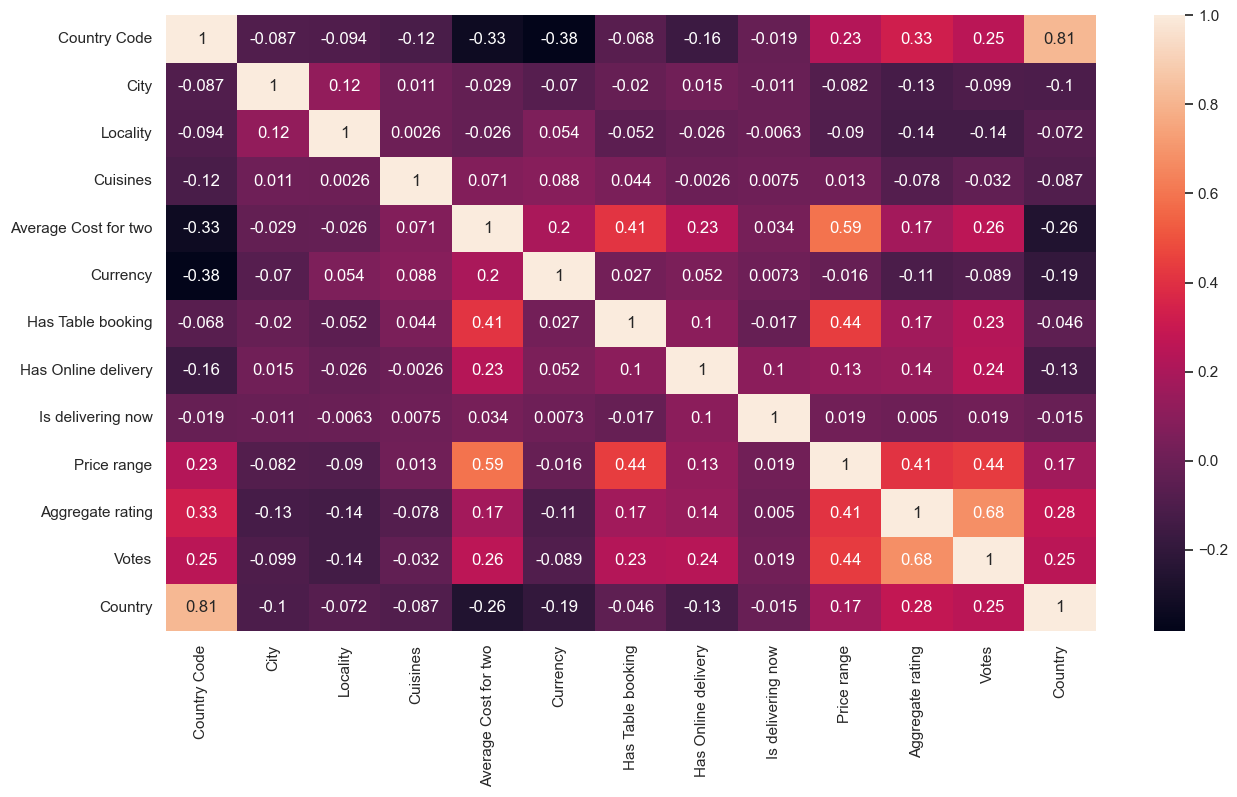

In [43]:
#Get Correlation Between Difference variables
corr = df.corr(method='kendall')
plt.figure(figsize=(15,8))
sns.heatmap(corr, annot=True)

In [44]:
df.skew()

Country Code             3.043965
City                    -1.243427
Locality                -0.255567
Cuisines                -0.307440
Average Cost for two    35.477915
Currency                 2.858093
Has Table booking        2.321100
Has Online delivery      1.114620
Is delivering now       16.673412
Price range              0.889618
Aggregate rating        -0.954130
Votes                    8.807637
Country                  3.312721
dtype: float64

# Predicting DataSet with respect to "Price Range"

In [45]:
X=df.drop(['Price range'], axis=1)
y=df['Price range']

In [46]:
x=X

In [47]:
#Getting Test and Training set
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=7)
x_train.head()
y_train.head()

7590    1
2907    1
5473    1
8056    2
8161    2
Name: Price range, dtype: int64

In [48]:
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error
from sklearn.linear_model import LogisticRegression,Lasso,LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import AdaBoostRegressor,GradientBoostingRegressor
from sklearn.preprocessing import LabelEncoder,StandardScaler
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.decomposition import PCA
from scipy.stats import zscore
from sklearn.model_selection import cross_val_score

# Linear Regression Model

In [49]:
#prepare a Linear Regression Model
reg=LinearRegression()
reg.fit(x_train,y_train)
y_pred=reg.predict(x_test)

In [50]:
from sklearn.metrics import r2_score
r2_score(y_test,y_pred)

0.46148901022643274

Linear Regression has only R^2 score of only 46.15%

# Decision Tree Regression

In [51]:
#prepaing a Decision Tree Regression
from sklearn.tree import DecisionTreeRegressor
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.1,random_state=105)
DTree=DecisionTreeRegressor(min_samples_leaf=.0001)
DTree.fit(x_train,y_train)
y_predict=DTree.predict(x_test)
from sklearn.metrics import r2_score
r2_score(y_test,y_predict)

0.9758525201040665

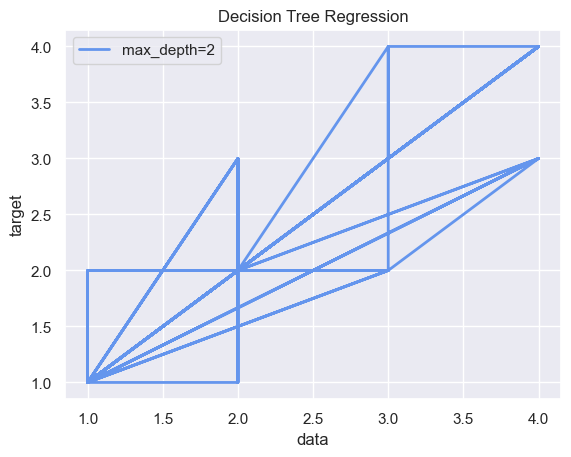

In [52]:
#plot the results
plt.figure()
plt.plot(y_test,y_predict,color="cornflowerblue",label="max_depth=2",linewidth=2)
plt.xlabel("data")
plt.ylabel("target")
plt.title("Decision Tree Regression")
plt.legend()
plt.show()

Decision Tree Regression has R^2 score of 97.84%

# Random Forest Regression

In [53]:
#Preparing Random Forest Regression
from sklearn.ensemble import RandomForestRegressor
RForest=RandomForestRegressor(n_estimators=500,random_state=329,min_samples_leaf=.0001)
RForest.fit(x_train,y_train)
y_predict=RForest.predict(x_test)
from sklearn.metrics import r2_score
r2_score(y_test,y_predict)

0.9797790884313045

Random Forest Regression has R^2 score of 97.977%

# Extra Tree Regression

In [54]:
#Preparing Random Forest Regression
from sklearn.ensemble import ExtraTreesRegressor
ETree=ExtraTreesRegressor(n_estimators=100)
ETree.fit(x_train,y_train)
y_predict=ETree.predict(x_test)
from sklearn.metrics import r2_score
r2_score(y_test,y_predict)

0.9779309826631092

Extra Tree Regression has R^2 score of 97.672%

Predicting the Dataset with Target set as "Price Range" with Random Forest Regression has R^2 score of 97.977% as highest amongst other Model predictions

# Predicting Dataset with respect to "Average cost for two"

In [55]:
x=df.drop(['Average Cost for two','Is delivering now'],axis=1)
y=df['Average Cost for two']

In [56]:
x=X

In [57]:
#Standardize the value of x so that mean will 0 and SD will become 1, and make the data as normal distributed
sc= StandardScaler()
sc.fit_transform(x)
x = pd.DataFrame(x,columns=x.columns)

In [61]:
# Now  by using multiple alogrithms we are calculating the best algo which suit best for our data set

model = [DecisionTreeRegressor(),KNeighborsRegressor(),AdaBoostRegressor(),LinearRegression(),GradientBoostingRegressor()]
max_r2_score = 0
for r_state in range (0,200):
    train_x,test_x,train_y,test_y = train_test_split(x,y,random_state = r_state,test_size = 0.33)
    for i in model:
        i.fit(train_x,train_y)
        pre = i.predict(test_x)
        r2_sc = r2_score(test_y,pre)
        print("R2 score correspond to random state ",r_state,"is", r2_sc)
        if r2_sc> max_r2_score:
            max_r2_score=r2_sc
            final_state = r_state
            final_model = i
            
print()
print()
print()
print()
print("max R2 score correspond to random state ",final_state , "is" ,max_r2_score ,"and model is",final_model)

R2 score correspond to random state  0 is 0.8665445313507185
R2 score correspond to random state  0 is 0.7608532598080002
R2 score correspond to random state  0 is 0.8783350126263106
R2 score correspond to random state  0 is 1.0
R2 score correspond to random state  0 is 0.8719744686278741
R2 score correspond to random state  1 is 0.8144094869419586
R2 score correspond to random state  1 is 0.8694304893192448
R2 score correspond to random state  1 is 0.8554343834606739
R2 score correspond to random state  1 is 1.0
R2 score correspond to random state  1 is 0.972120394564721
R2 score correspond to random state  2 is 0.9279188913513501
R2 score correspond to random state  2 is 0.9977531465803355
R2 score correspond to random state  2 is 0.9681264527133724
R2 score correspond to random state  2 is 1.0
R2 score correspond to random state  2 is 0.997122207460337
R2 score correspond to random state  3 is 0.9676196643436237
R2 score correspond to random state  3 is 0.996067873412759
R2 score co

In [62]:
from sklearn import datasets
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.decomposition import PCA
from sklearn.metrics import mean_squared_error

In [63]:
#Create Training and Test split 
X_train, X_test, y_train, y_test = train_test_split(x, y, random_state=131, test_size=0.2)

In [64]:
#Standardize the dataset
sc = StandardScaler()
X_train_std = sc.fit_transform(X_train)
X_test_std = sc.transform(X_test)

# Gradient Boosting Regressor

In [67]:
#Hyperparameters for GradientBoostingRegressor
gbr_params = {'n_estimators': 1000,
          'max_depth': 3,
          'min_samples_split': 5,
          'learning_rate': 0.01,
          'loss': 'ls'}
                

In [68]:
#Create an instance of gradientboostingregressor
gbr = GradientBoostingRegressor(**gbr_params)

#fit the model
gbr.fit(X_train_std, y_train)

GradientBoostingRegressor(learning_rate=0.01, loss='ls', min_samples_split=5,
                          n_estimators=1000)

In [69]:
#print Coefficient of determinations R^2

print("Model Accuracy: %.3f" % gbr.score(X_test_std, y_test))

#Create the mean squared error

mse = mean_squared_error(y_test, gbr.predict(X_test_std))
print("The mean squared error (MSE) on test set: {:.4f}".format(mse))

Model Accuracy: 0.988
The mean squared error (MSE) on test set: 1313575.8001


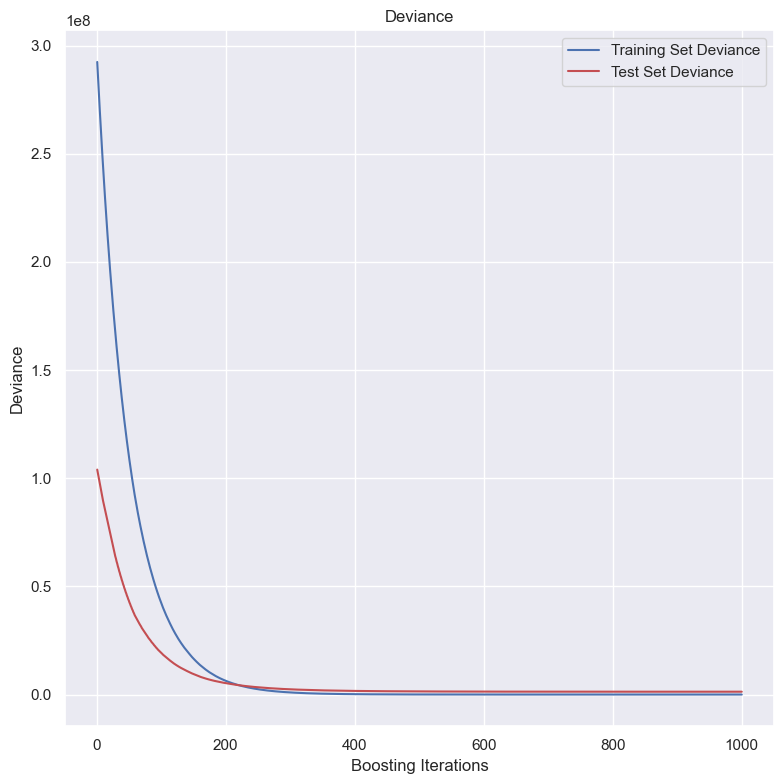

In [72]:
test_score = np.zeros((gbr_params['n_estimators'],), dtype=np.float64)
for i, y_pred in enumerate(gbr.staged_predict(X_test_std)):
    test_score[i] = gbr.loss_(y_test , y_pred)
    
fig = plt.figure(figsize=(8,8))
plt.subplot(1 , 1, 1)
plt.title('Deviance')
plt.plot(np.arange(gbr_params['n_estimators']) + 1, gbr.train_score_, 'b-',label='Training Set Deviance')
plt.plot(np.arange(gbr_params['n_estimators']) + 1, test_score, 'r-',label='Test Set Deviance')
plt.legend(loc='upper right')
plt.xlabel('Boosting Iterations')
plt.ylabel('Deviance')
fig.tight_layout()
plt.show()

# Decision Tree Regressor

In [82]:
model = DecisionTreeRegressor(random_state=44)
model.fit(X_train_std, y_train)
predictions = model.predict(X_test_std)
r2_score(y_test,predictions)

0.9559513353270637

In [83]:
#print Coefficient of determinations R^2

print("Model Accuracy: %.3f" % model.score(X_test_std, y_test))

#Create the mean squared error

mse = mean_squared_error(y_test, model.predict(X_test_std))
print("The mean squared error (MSE) on test set: {:.4f}".format(mse))

Model Accuracy: 0.956
The mean squared error (MSE) on test set: 4657254.3694


# Random Forest Regression

In [84]:
#Preparing Random Forest Regression
from sklearn.ensemble import RandomForestRegressor
RForest=RandomForestRegressor(n_estimators=500,random_state=131,min_samples_leaf=.0001)
RForest.fit(X_train_std,y_train)
y_predict=RForest.predict(X_test_std)
from sklearn.metrics import r2_score
r2_score(y_test,y_predict)

0.9831288937577345

In [85]:
#print Coefficient of determinations R^2

print("Model Accuracy: %.3f" % RForest.score(X_test_std, y_test))

#Create the mean squared error

mse = mean_squared_error(y_test, RForest.predict(X_test_std))
print("The mean squared error (MSE) on test set: {:.4f}".format(mse))

Model Accuracy: 0.983
The mean squared error (MSE) on test set: 1783777.8704


# Extra Tree Regression

In [86]:
#Preparing Random Forest Regression
from sklearn.ensemble import ExtraTreesRegressor
ETree=ExtraTreesRegressor(n_estimators=100)
ETree.fit(X_train_std,y_train)
y_predict=ETree.predict(X_test_std)
from sklearn.metrics import r2_score
r2_score(y_test,y_predict)

0.9998030210926105

In [87]:
#print Coefficient of determinations R^2

print("Model Accuracy: %.3f" % ETree.score(X_test_std, y_test))

#Create the mean squared error

mse = mean_squared_error(y_test, ETree.predict(X_test_std))
print("The mean squared error (MSE) on test set: {:.4f}".format(mse))

Model Accuracy: 1.000
The mean squared error (MSE) on test set: 20826.5309


# Predicting the Dataset with Target set as "Average Cost for two" with Extra Tree Regressor has R^2 score of 99% as highest amongst other Model Predictions

# Conclusion

Predicting the Dataset with Target set as "Price Range" with Random Forest Regressor has R^2 score of 97.97% as highest amongst other Model Predictions

Predicting the Dataset with Target set as "Average Cost for two" with Extra Tree Regressor has R^2 score of 99.98% as highest amongst other Model Predictions